# Wissahickon Soil Strength and Moisture 

### *This notebook describes data collected in the Wissahickon park in Philadelphia, PA.*
#### *Data was collected on a single hill slope at multiple time points and using different spatiotemporal sampling strategies. The particular hillslope was selected because it was accessible, contained a transect from valley to ridge that could be traversed by both robot and human, and was broadly representative of the hill slopes in the region (elevation monotonically increasing from NE valley to SW ridge).*

<img src="Hillslope.png" width="800" height="500" align="left" />

In [1]:
# install neccessary packages and load libraries
install.packages (c("tidyverse"))
library ("tidyverse")

# load dataframe and split by date variable 
WissDat <- read.csv("Data.csv")
WissDat$Date <- ifelse (WissDat$Date == "23-Sep" & WissDat$Measurement == 0, "23-Sep (A)", 
                       ifelse(WissDat$Date == "23-Sep" & WissDat$Measurement == 1, "23-Sep (B)", WissDat$Date))
WissDat.split <- split(WissDat, WissDat$Date)
July29 <- WissDat.split$`29-Jul`
July30 <- WissDat.split$`30-Jul`
Aug5 <- WissDat.split$`5-Aug`
Aug6 <- WissDat.split$`6-Aug`
Aug8 <- WissDat.split$`8-Aug`
Sept23a <- WissDat.split$`23-Sep (A)`
Sept23b <- WissDat.split$`23-Sep (B)`
Oct7 <- WissDat.split$`7-Oct`

# create colorblind friendly palette for plotting
cbp1 <- c("#D55E00", "#E69F00", "#56B4E9", "#0072B2","#F0E442","#009E73","#999999", "#CC79A7")


The downloaded binary packages are in
	/var/folders/jj/s0c022d1157gynprm2q257dr0000gp/T//RtmpEaHF7s/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Relationship between soil strength and moisture along hill transect
#### *During two visits in July 2019, data was collected along a transect made up of 9 evenly spaced locations (roughly 25 meters apart), with 4 measurements taken at each location (perpendicular to the transect), per visit.*
<img src="SamplingEnvironmentJuly2019.jpg" width="600" height="500" align="left" />

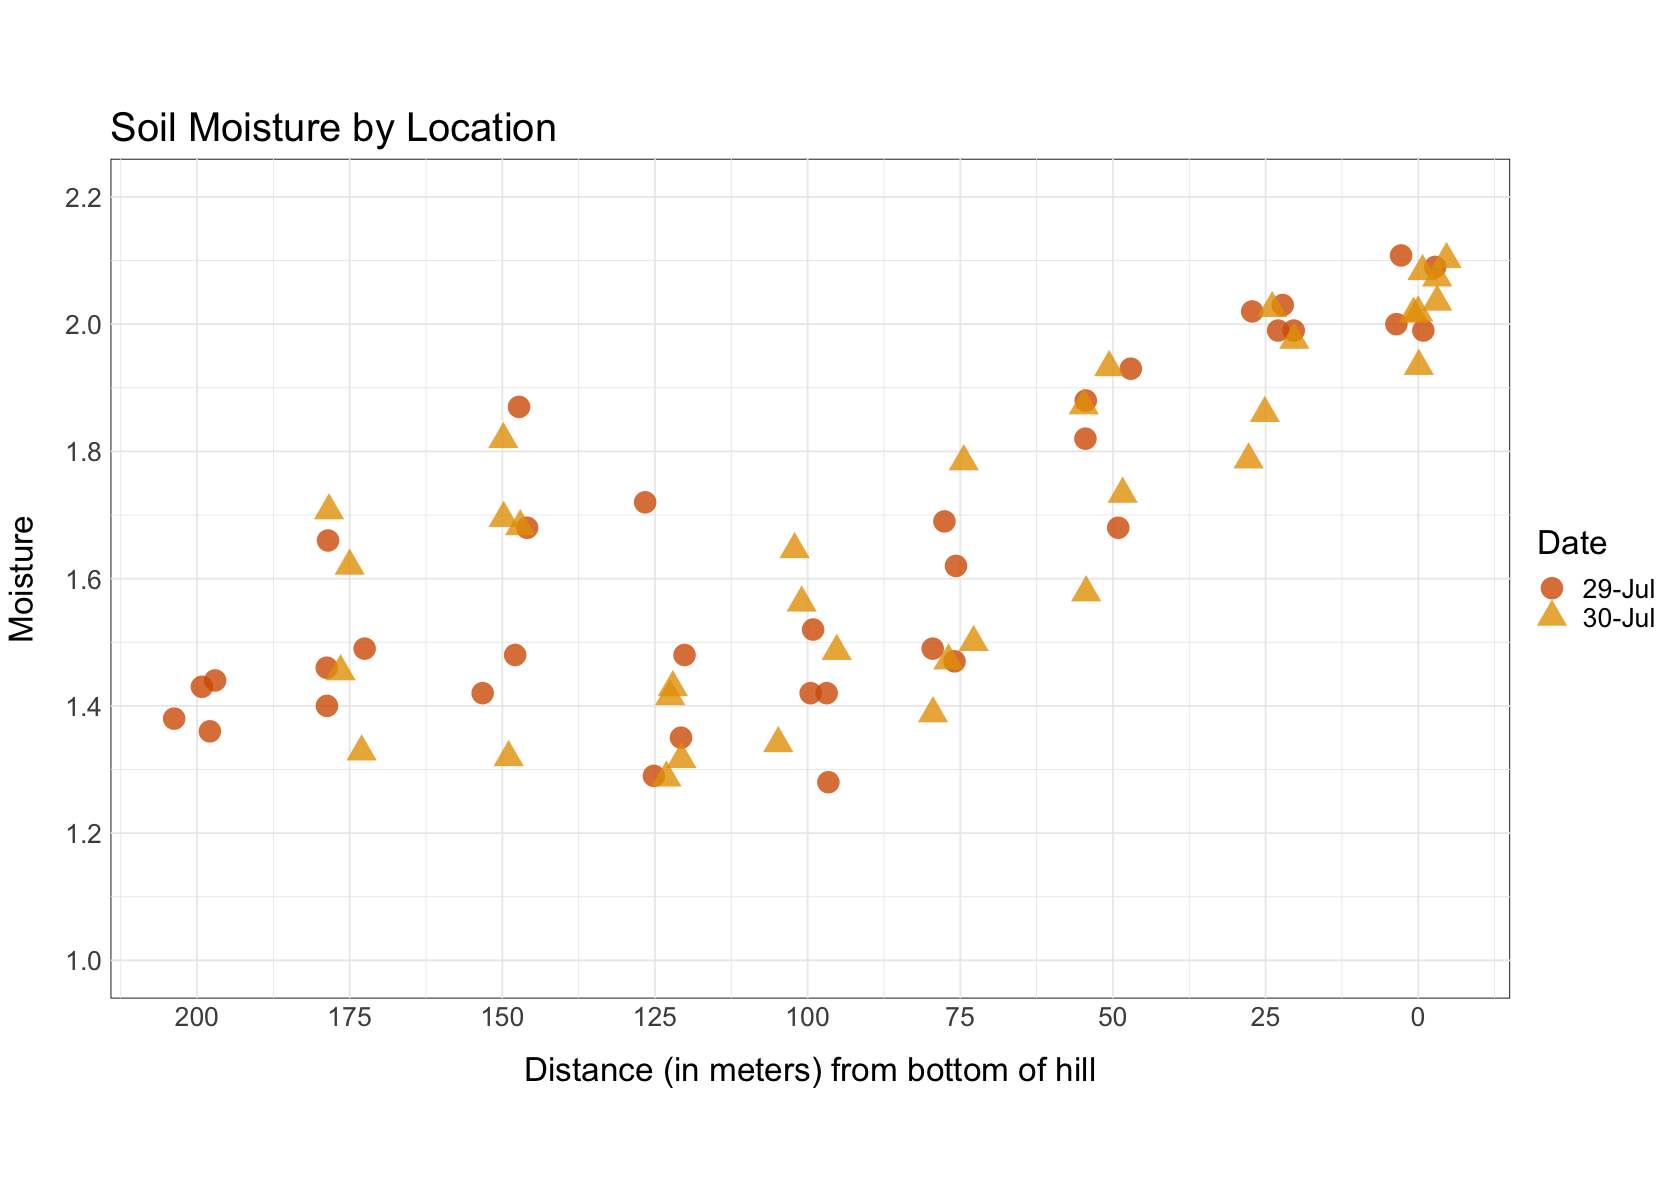

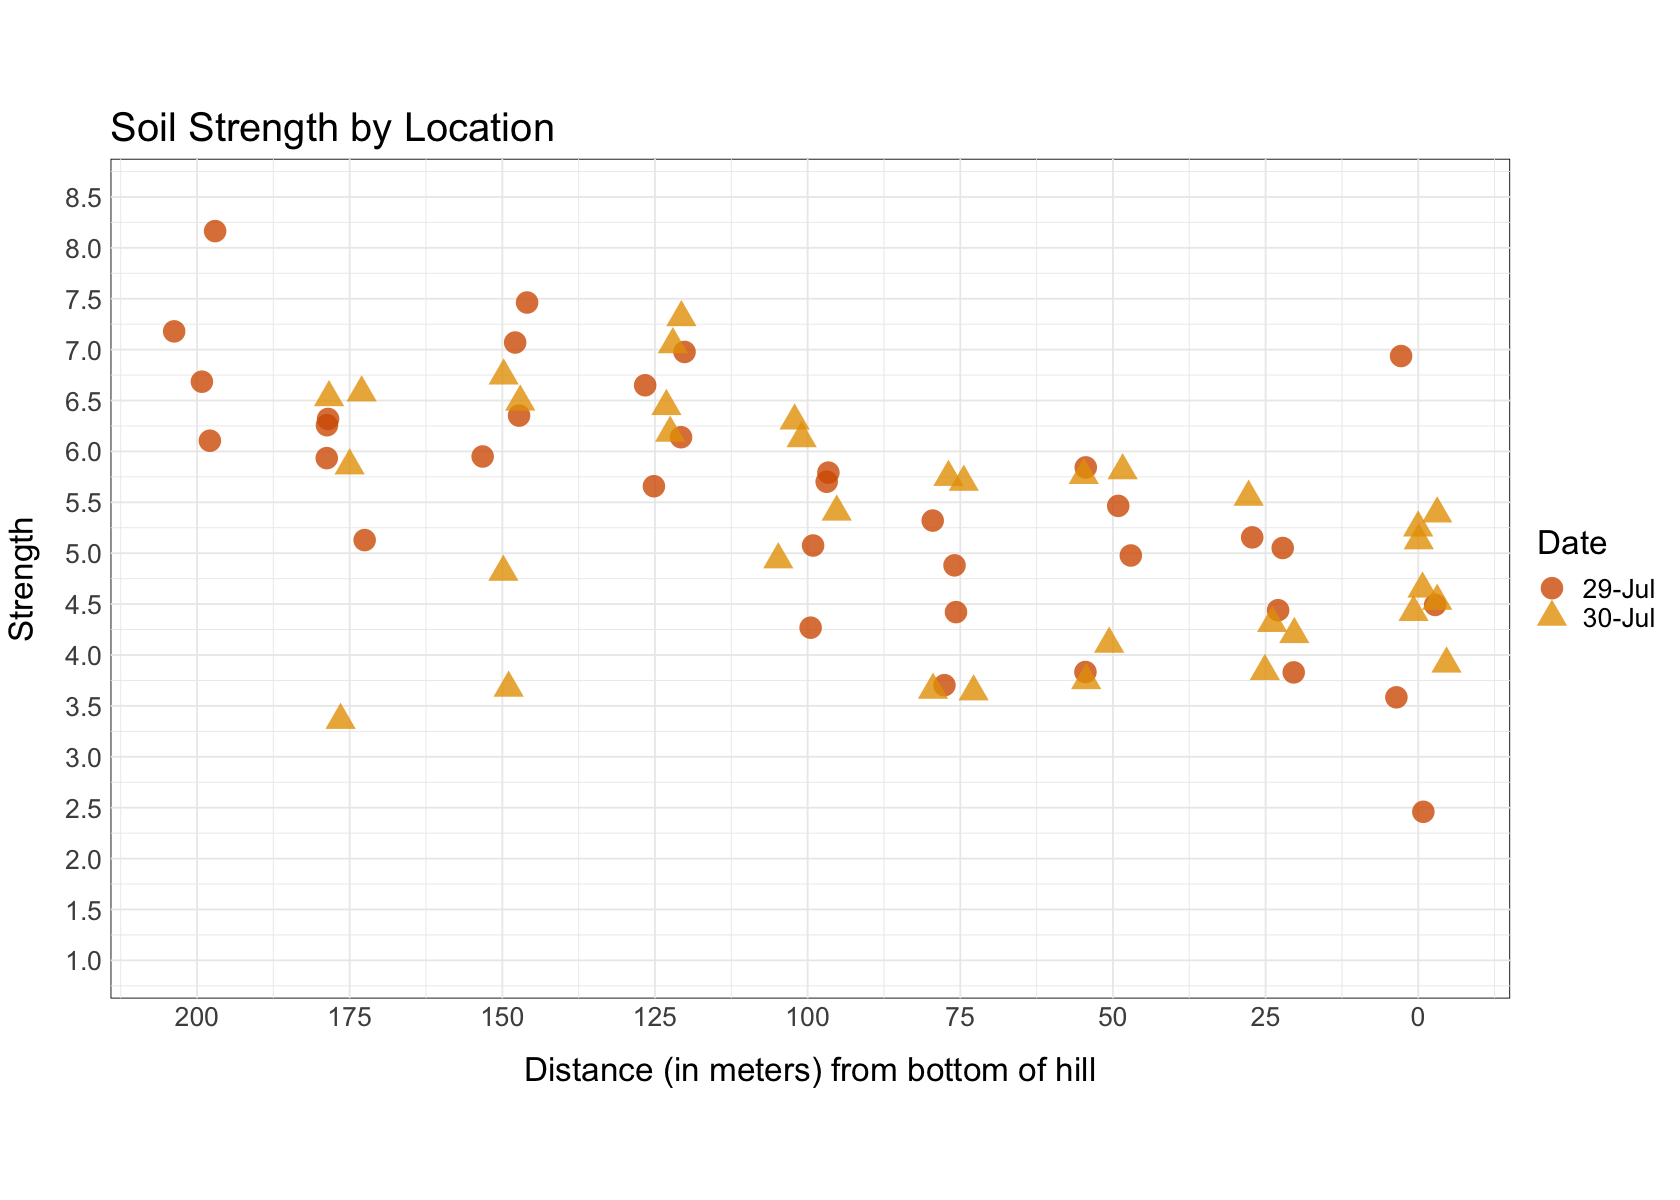

In [2]:
# moisture by location plot for data collection on two days in July 2019
WissDat.Transect<- rbind(July29, July30)
options (repr.plot.width=14, repr.plot.height=10)
WissDat.Transect$DistJitter <- jitter(WissDat.Transect$Distance, amount = 5)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Moisture, color=Date, shape=Date)) +
    geom_point(size=6, alpha=.8) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 2.2, .2), limits = c(1, 2.2)) +
    scale_color_manual (values = cbp1) +
    theme_minimal() +
    ggtitle ("Soil Moisture by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

# strength by location plot for data collection on two days in July 2019
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Strength, color=Date, shape=Date)) +
    geom_point(size=6, alpha=.8) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 8.5, .5), limits = c(1, 8.5)) +
    scale_color_manual (values = cbp1) +
    theme_minimal() +
    ggtitle ("Soil Strength by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

##### *Where strength is operationalized as the slope of the force of over time. (WAITING ON FORCE PLOTS FROM FEIFEI)*
<img src="JulyForce.jpg" width="100" height="100" align="left" />

##### During a visit in September 2020, data was collected along the same transect, but instead of 9 locations with 4 measurements each, data was collected at 38 locations (approximately 5 meters apart) with 1 measurement per location. The same sampling strategy was also used along a new transect to the North of the original transect (see blue pins).

<img src="SamplingEnvironmentSeptember2020.jpg" width="600" height="500" align="left" />

##### The aim of this sampling strategy was to collect data at a higher spatial resolution, more akin to a robotic path-planning approach to data collection, to determine if patterns of decreasing soil moisture and increasing soil strength (from top of hillslope to bottom) could be replicated. The new data supports the original observed patterns from July 2019.

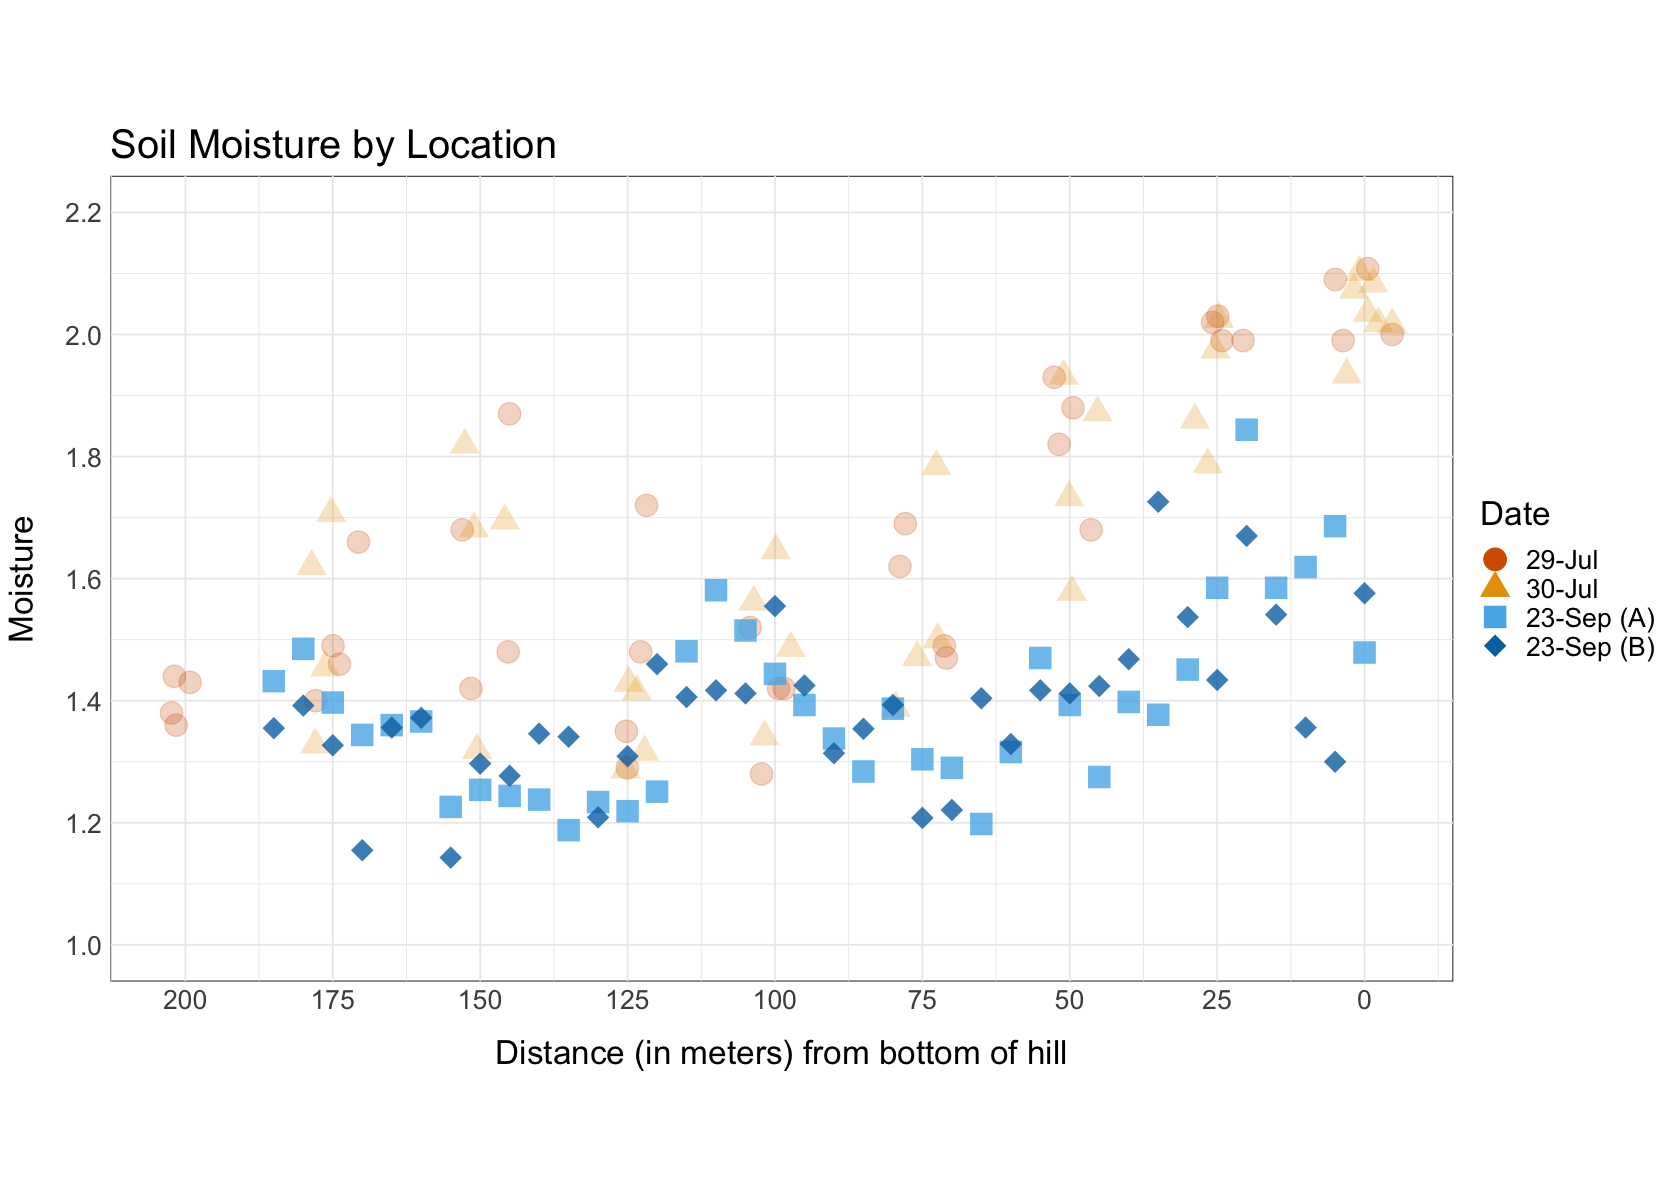

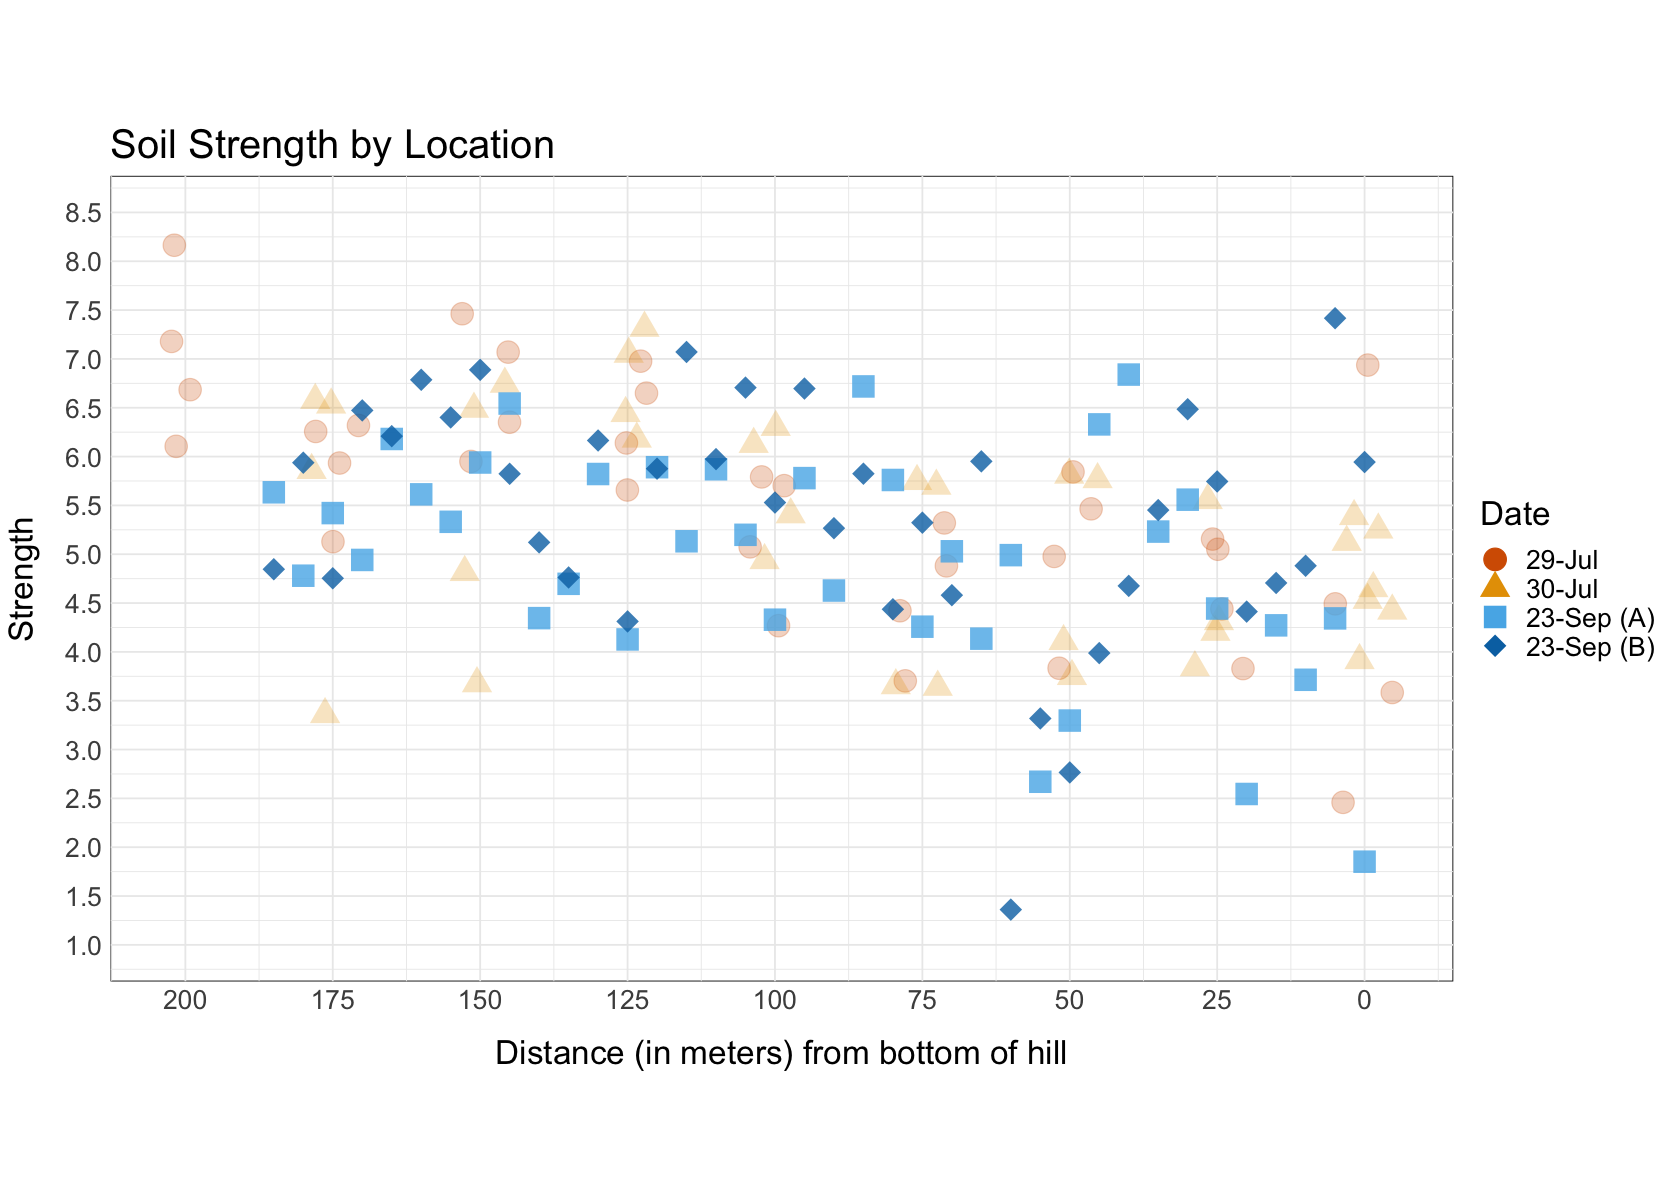

In [3]:
# moisture by location plot that now includes data collection in September 2020
WissDat.Transect <- rbind(July29, July30, Sept23a, Sept23b)
WissDat.Transect$DistJitter <- ifelse(WissDat.Transect$Date == "29-Jul" | WissDat.Transect$Date == "30-Jul",
                                      jitter(WissDat.Transect$Distance, amount = 5), WissDat.Transect$Distance)
WissDat.Transect$Date <- factor(WissDat.Transect$Date, levels = c("29-Jul", "30-Jul", "23-Sep (A)", "23-Sep (B)"))
alpha <- ifelse(WissDat.Transect$Date == "29-Jul" | WissDat.Transect$Date == "30-Jul", .25, .8)
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Moisture, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 2.2, .2), limits = c(1, 2.2)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18)) +
    theme_minimal() +
    ggtitle ("Soil Moisture by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

# strength by location plot that now includes data collection in September 2020
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Strength, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 8.5, .5), limits = c(1, 8.5)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18)) +
    theme_minimal() +
    ggtitle ("Soil Strength by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

<img src="September2020Force.png" width="750" height="400" align="left"/>

##### During a visit in October 2020, data was collected along three transects, perpendicular to the original transect, roughly corresponding to the top, middle, and bottom of the hillslope (see yellow pins). Along these transects, 1 measurement was collected approximately every 5 meters. 

<img src="SamplingEnvironmentSeptember2020.jpg" width="600" height="500" align="left" />

##### The aim of this sampling strategy was to determine if our assumption about the primary gradient was accurate, namely, that changes in soil strength and moisture were greatest moving from the bottom to the top of the hill, while variation moving across the hill (side-to-side) was consistent. This assumption was supported by the data.

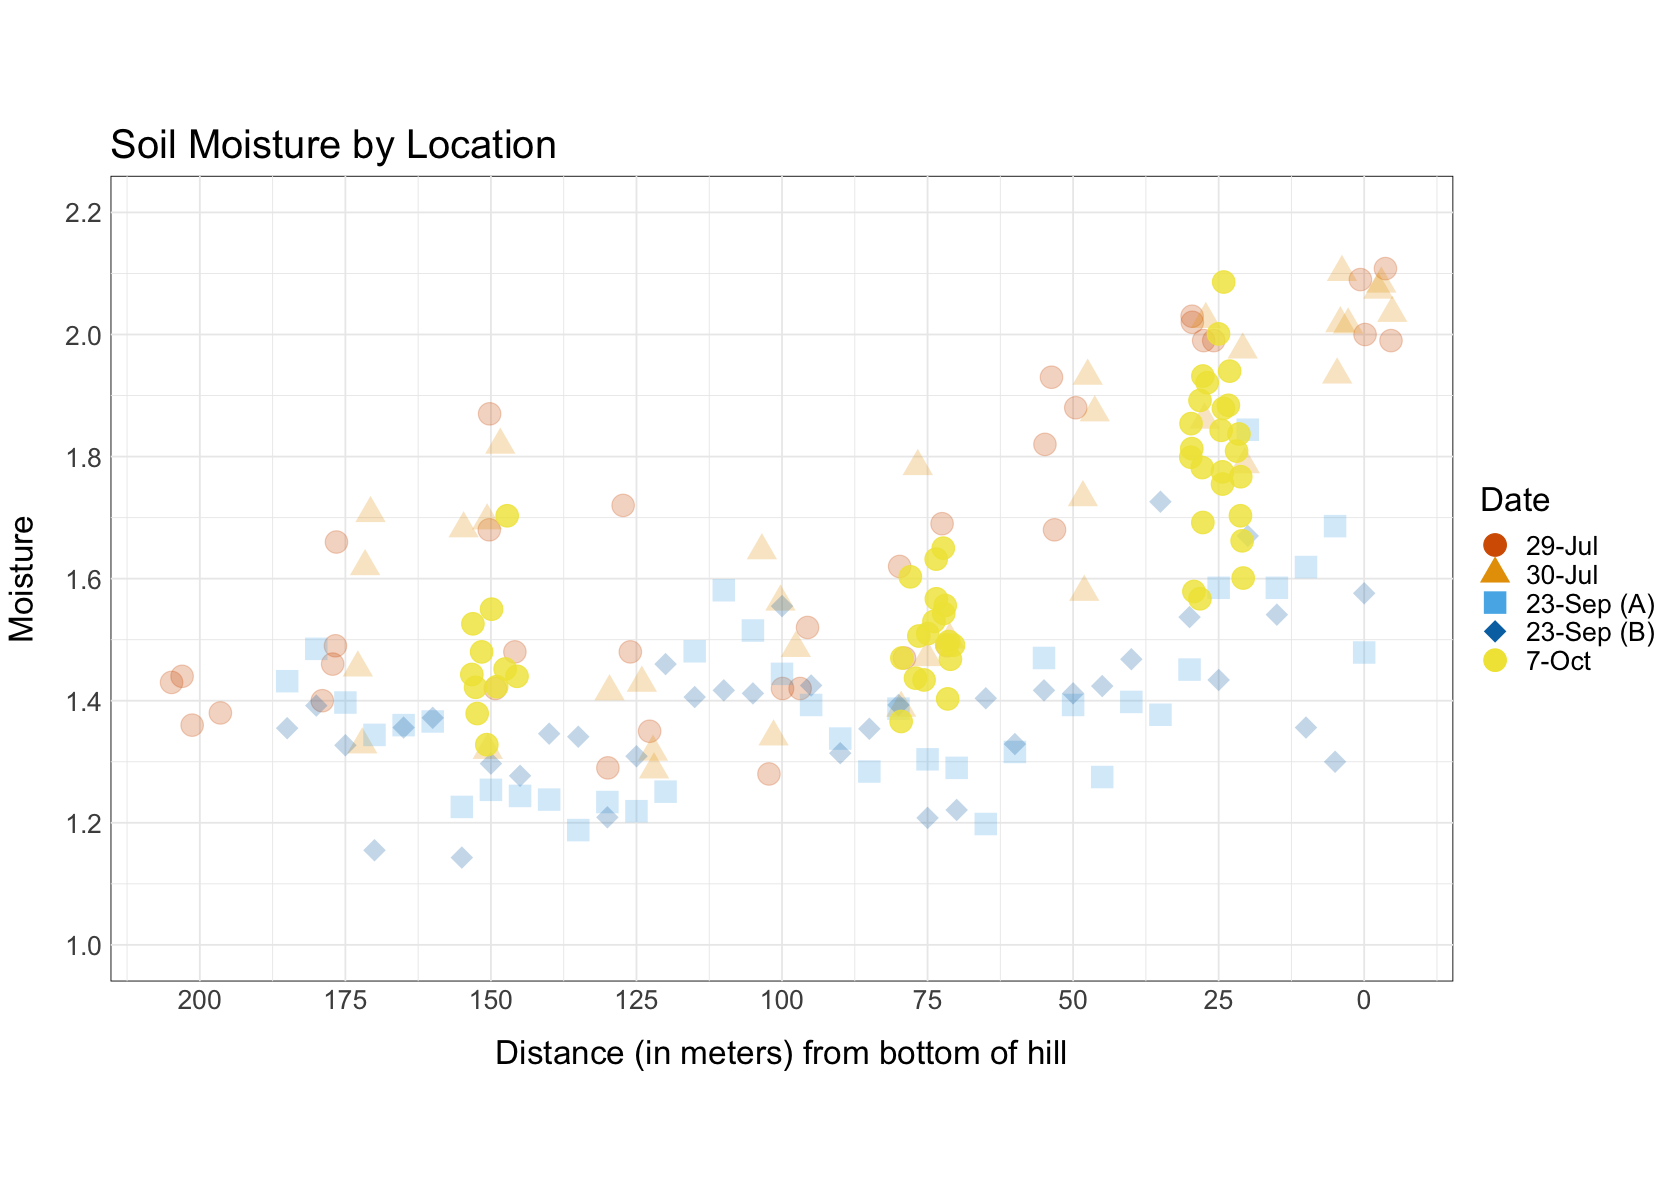

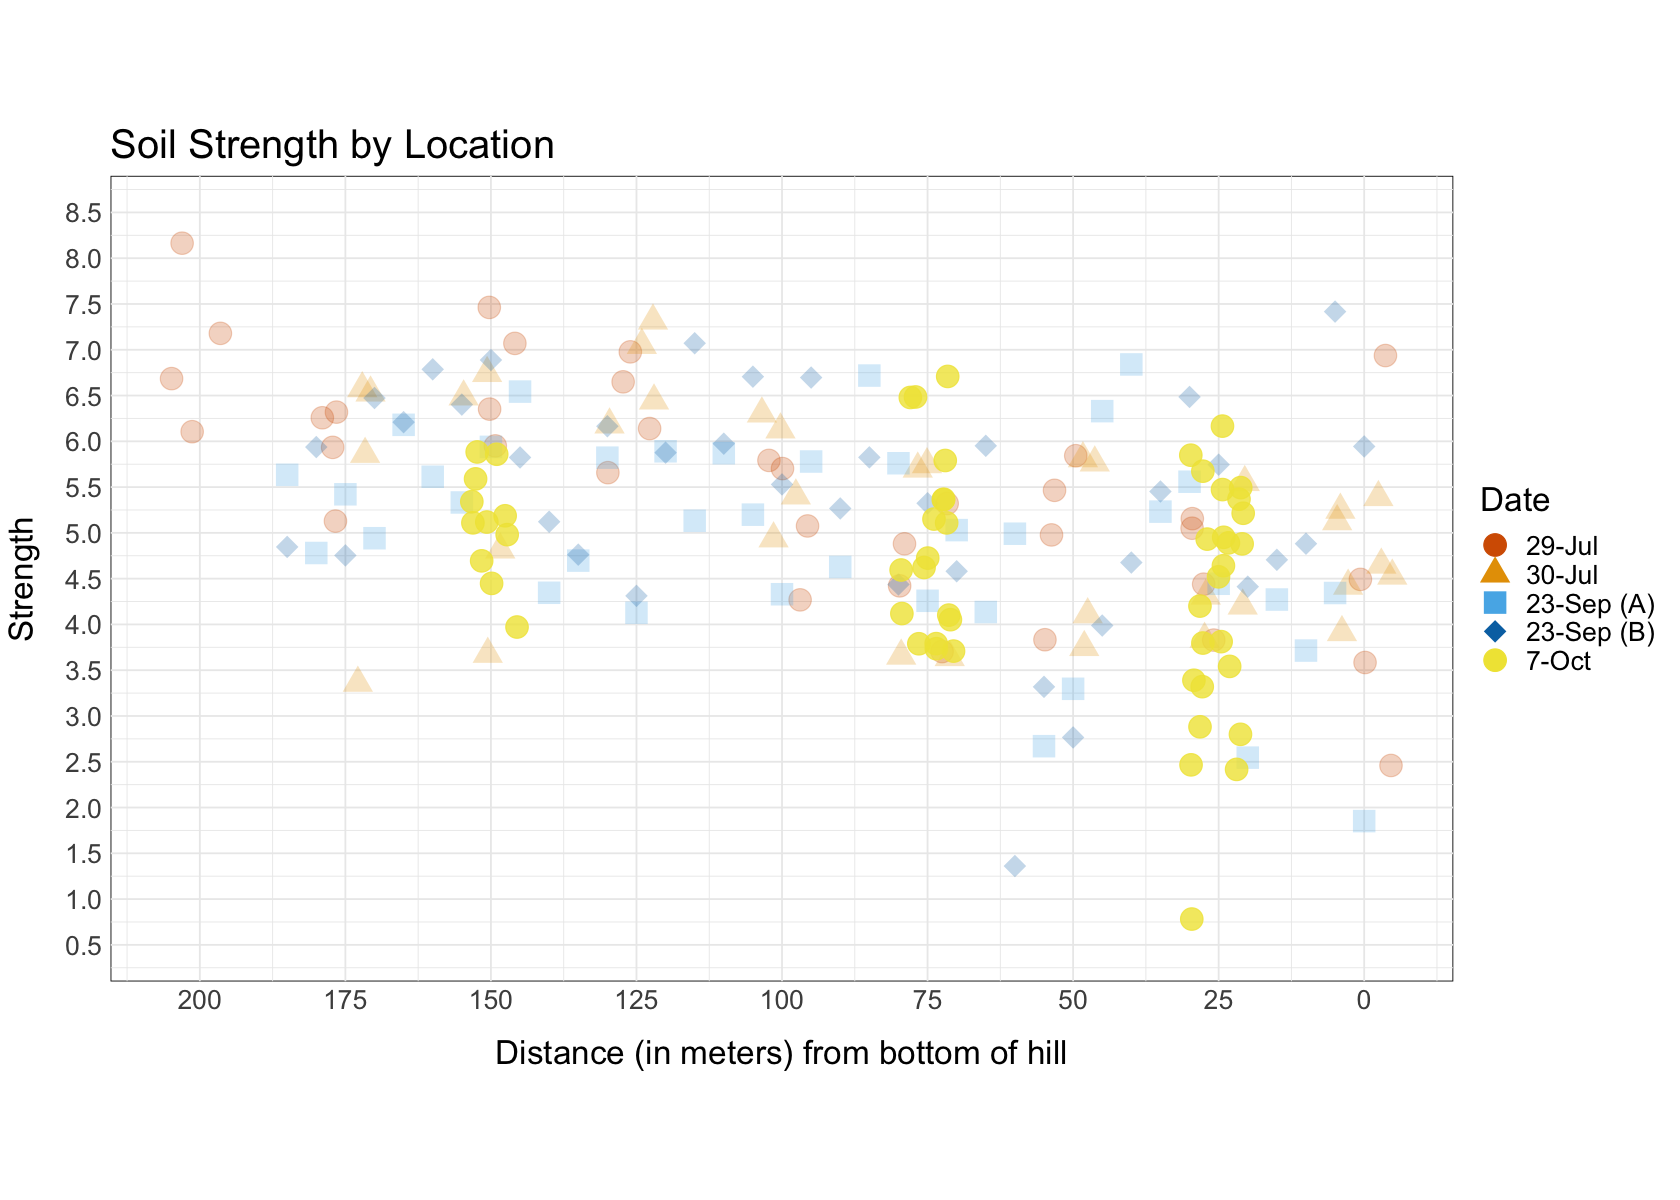

In [4]:
# moisture by location plot that now includes data collection in October 2020
WissDat.Transect <- rbind(July29, July30, Sept23a, Sept23b, Oct7)
WissDat.Transect$DistJitter <- ifelse(WissDat.Transect$Date == "29-Jul" | WissDat.Transect$Date == "30-Jul" | 
                                      WissDat.Transect$Date == "7-Oct", jitter(WissDat.Transect$Distance, 
                                      amount = 5), WissDat.Transect$Distance)
WissDat.Transect$Date <- factor(WissDat.Transect$Date, levels = c("29-Jul", "30-Jul", "23-Sep (A)", "23-Sep (B)", "7-Oct"))
alpha <- ifelse(WissDat.Transect$Date == "7-Oct", .8, .25)
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Moisture, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 2.2, .2), limits = c(1, 2.2)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18,19)) +
    theme_minimal() +
    ggtitle ("Soil Moisture by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

# strength by location plot that now includes data collection in September 2020
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Strength, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(0.5, 8.5, .5), limits = c(0.5, 8.5)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18,19)) +
    theme_minimal() +
    ggtitle ("Soil Strength by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

<img src="October2020Force.png" width="900" height="400" align="left"/>

### Relationship between soil strength and moisture after rain 
##### *Following a temporal sequence of rain events, data was collected at a subset of transect locations, roughly representing the bottom, middle, and top of the hillslope, and 4 measurements were taken at each location per visit. Data is plotted for three visits occuring in August 2020. The timing of visits is indicated by the vertical gray lines on the weather profile below*

<img src="RainTimeline.jpg" width="700" height="800" align="left" />

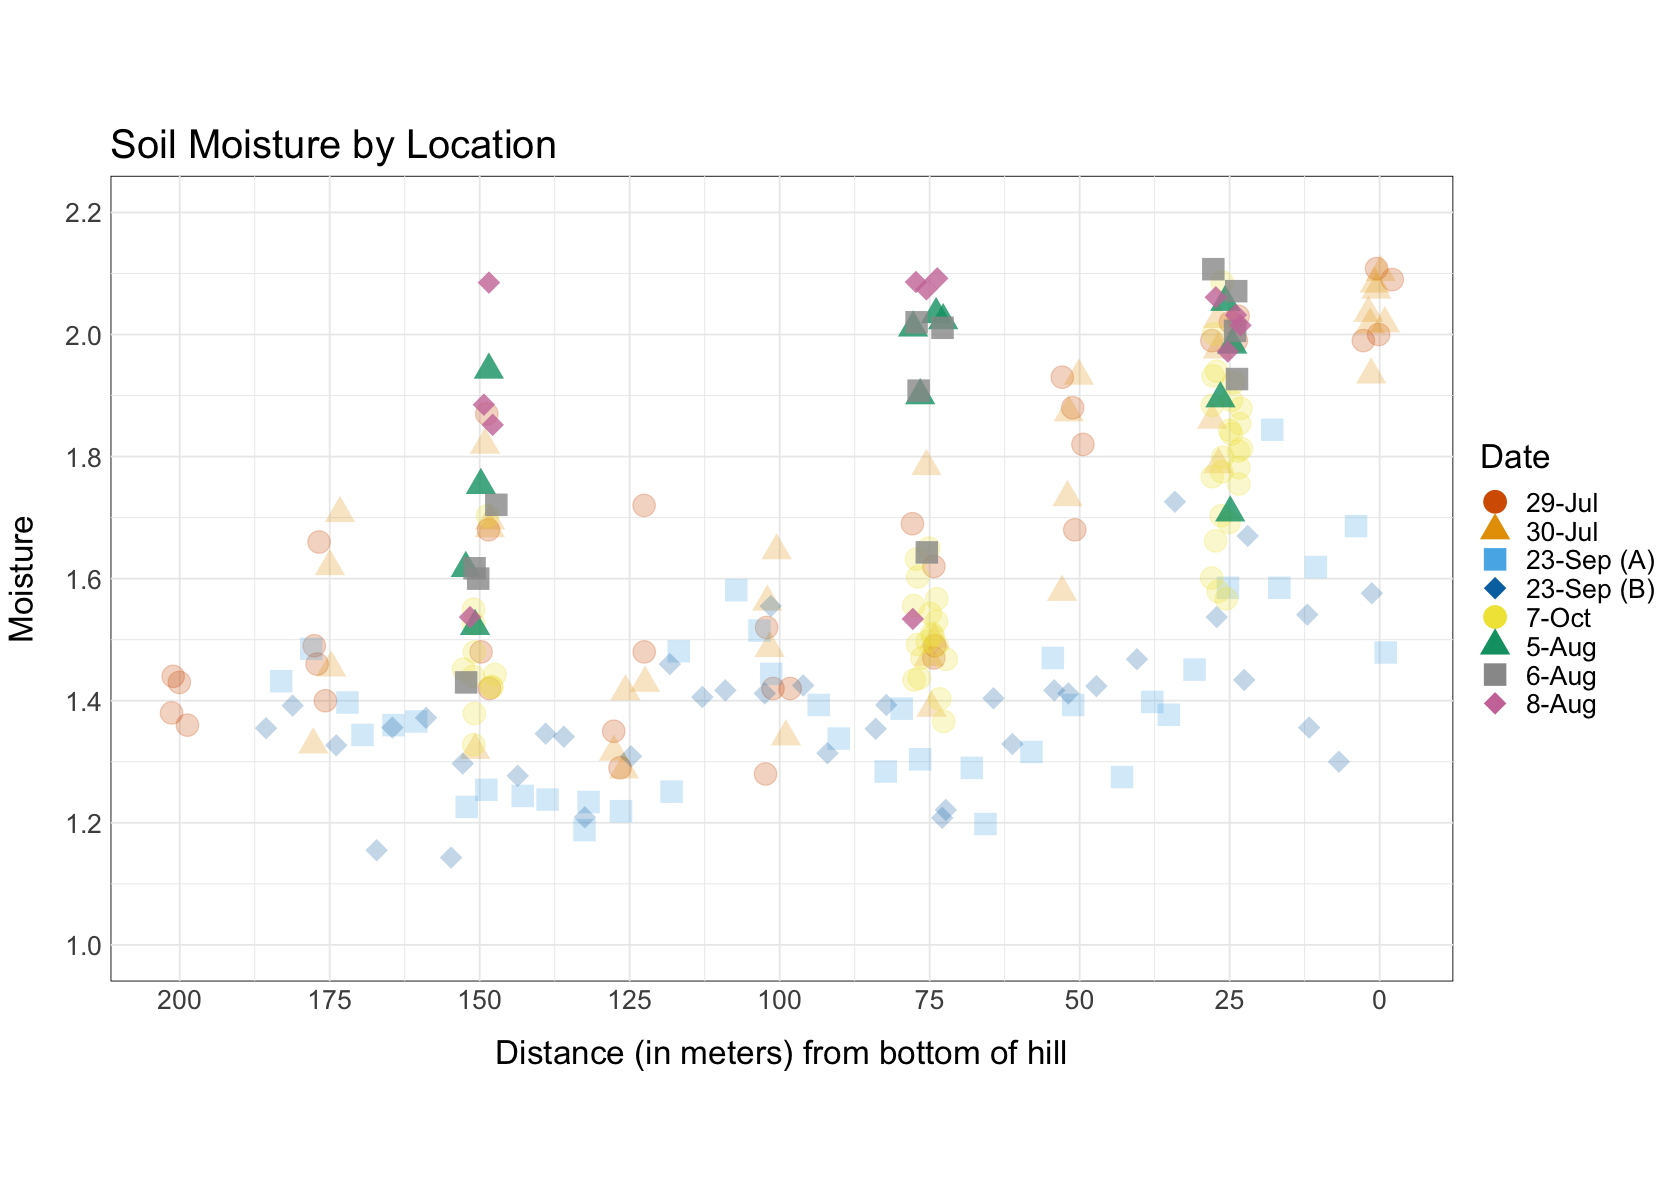

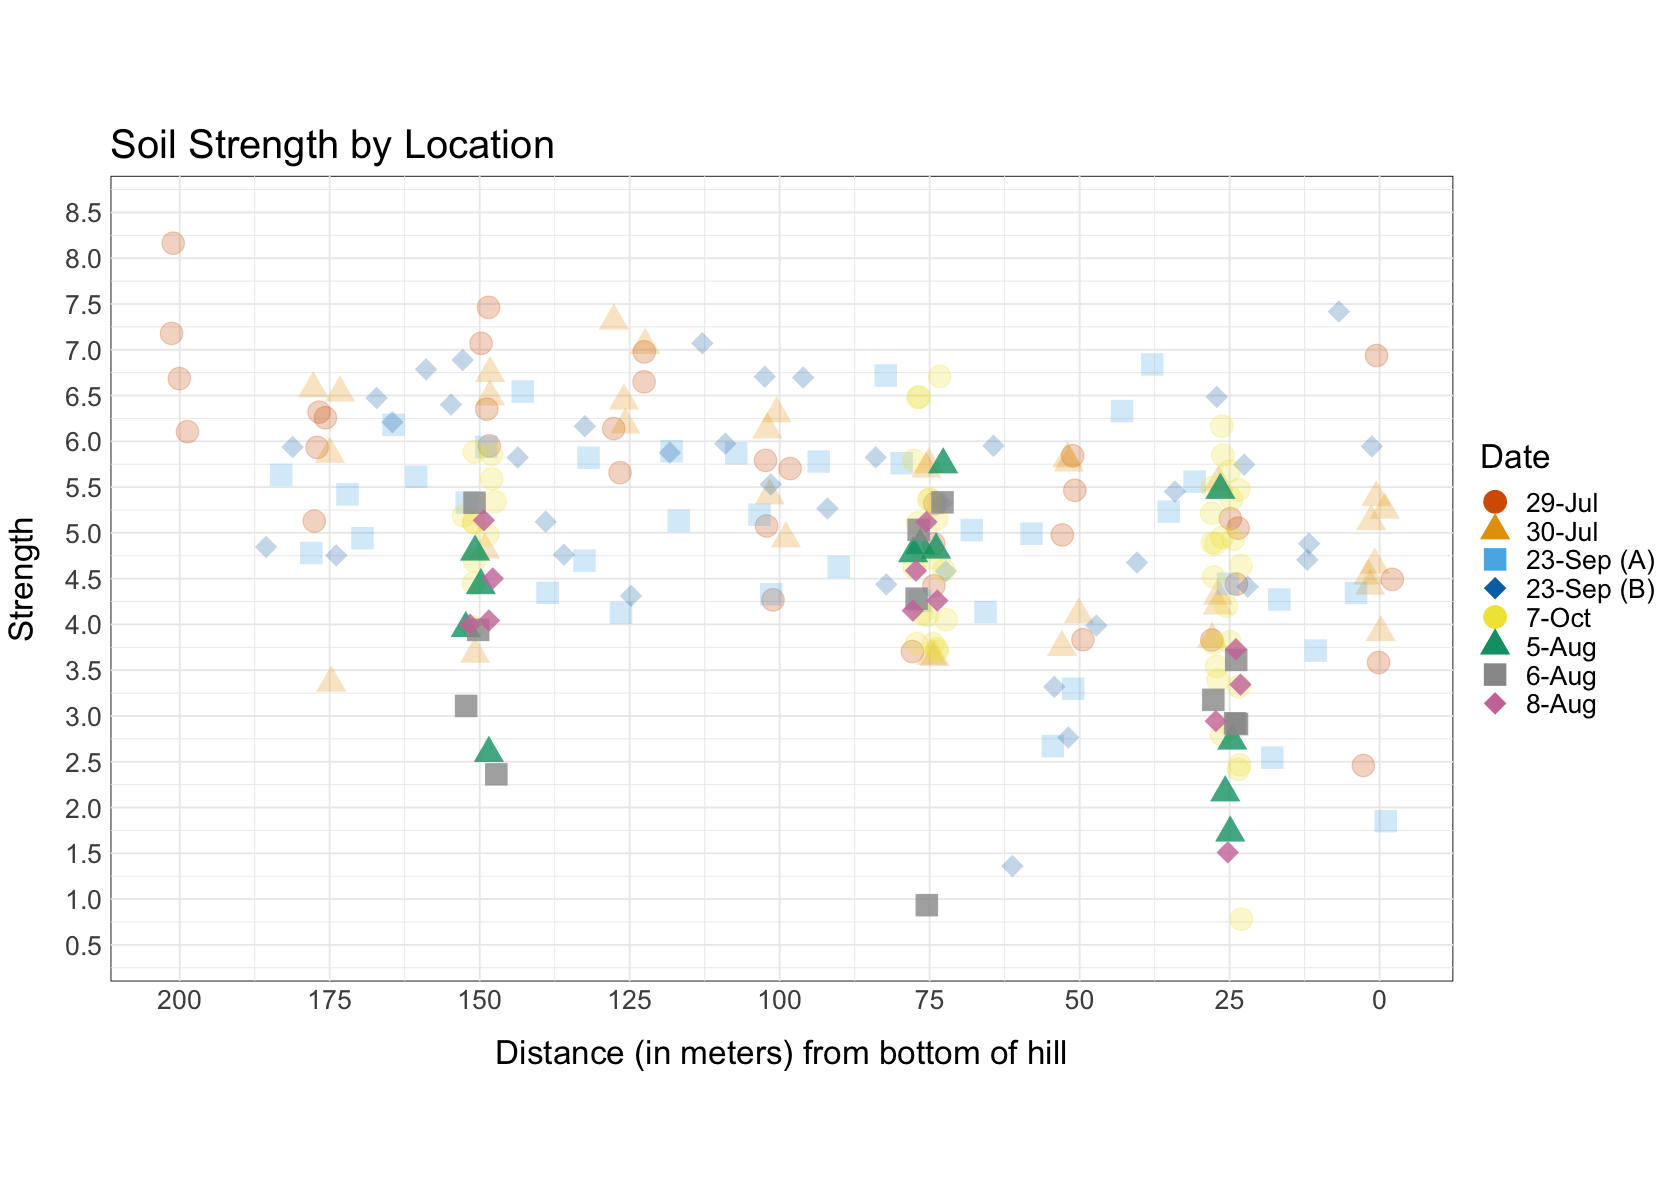

In [5]:
# moisture by location plot that now includes data collection in August 2020
WissDat.Rain <- rbind(July29, July30, Sept23a, Sept23b, Oct7, Aug5, Aug6, Aug8)
WissDat.Rain$DistJitter <- ifelse(WissDat.Rain$Date == "23-Sept (A)" | WissDat.Rain$Date == "23-Sep (B)",
                                      WissDat.Rain$Distance, jitter(WissDat.Rain$Distance, amount = 5))
WissDat.Rain$Date <- factor(WissDat.Rain$Date, levels = c("29-Jul", "30-Jul", "23-Sep (A)", "23-Sep (B)",
                                                                 "7-Oct","5-Aug", "6-Aug", "8-Aug"))
alpha <- ifelse(WissDat.Rain$Date == "5-Aug" | WissDat.Rain$Date == "6-Aug" | 
                WissDat.Rain$Date == "8-Aug", .8, .25)
options (repr.plot.width=14, repr.plot.height=10)
WissDat.Rain$DistJitter <- jitter(WissDat.Rain$Distance, amount = 3)
print (ggplot(WissDat.Rain, aes(x=DistJitter, y=Moisture, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 2.2, .2), limits = c(1, 2.2)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18,19,17,15,18)) +
    theme_minimal() +
    ggtitle ("Soil Moisture by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

# strength by location plot that now includes data collection in August 2020
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Rain, aes(x=DistJitter, y=Strength, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(0.5, 8.5, .5), limits = c(0.5, 8.5)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18,19,17,15,18)) +
    theme_minimal() +
    ggtitle ("Soil Strength by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

<img src="RainEventForce.jpg" width="750" height="800" align="left"/>